<a href="https://colab.research.google.com/github/ArjunaBazaz/Fruit_Classification/blob/main/EDA" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
train_dir = "../DATA/Fruits_Dataset_Train"
test_dir = "../DATA/Fruits_Dataset_Test"

In [3]:
# count images per class
def count_images_per_class(data_dir):
    class_counts = {}
    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

print("Train counts:", train_counts)
print("Test counts:", test_counts)


Train counts: {'1': 3486, '2': 3808, '3': 3866, '4': 3264, '5': 387, '6': 840, '7': 408, '8': 840}
Test counts: {'1': 871, '2': 952, '3': 966, '4': 816, '5': 96, '6': 210, '7': 102, '8': 210}


In [6]:
labels_path = "../DATA/Labels_Train.csv"
labels_df = pd.read_csv(labels_path)

labels_df.head()


,FileName,Mango,Grape,Plum,Kiwi,Pear,Apple,Orange,Banana,Pomegranate,...,Pineapple,Fig,Peach,Apricot,Avocado,Summer Squash,Lemon,Lime,Guava,Raspberry
0,20190106_072754.jpg,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20190106_072807.jpg,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20190106_072809.jpg,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20190106_072811.jpg,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20190106_072815.jpg,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


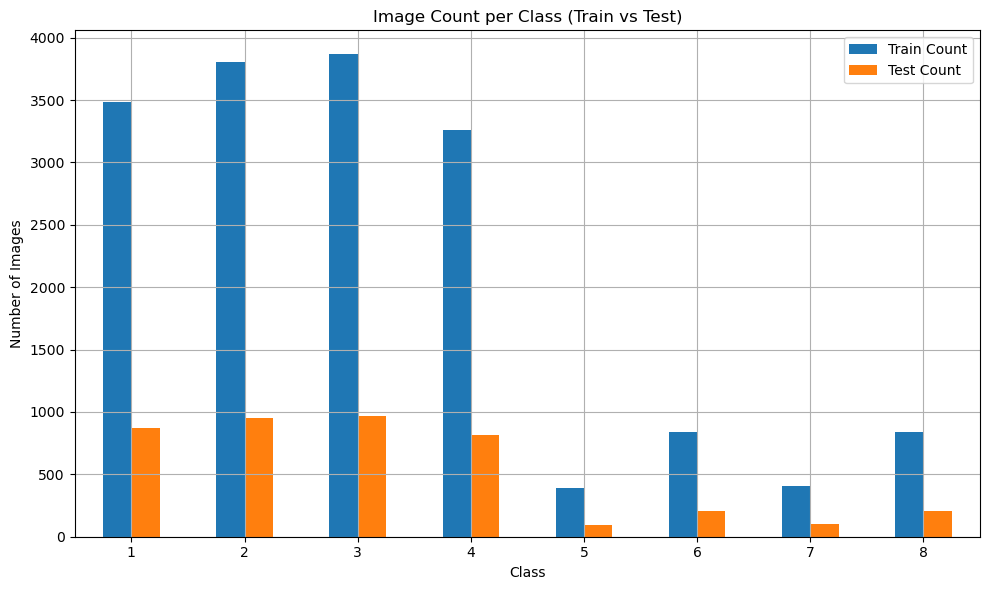

In [7]:
# convert count to DataFrame
train_df = pd.DataFrame(list(train_counts.items()), columns=["Class", "Train Count"])
test_df = pd.DataFrame(list(test_counts.items()), columns=["Class", "Test Count"])

# merge
class_summary = pd.merge(train_df, test_df, on="Class")
class_summary = class_summary.sort_values(by="Class")

# graph
class_summary.set_index("Class")[["Train Count", "Test Count"]].plot(kind="bar", figsize=(10, 6))
plt.title("Image Count per Class (Train vs Test)")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


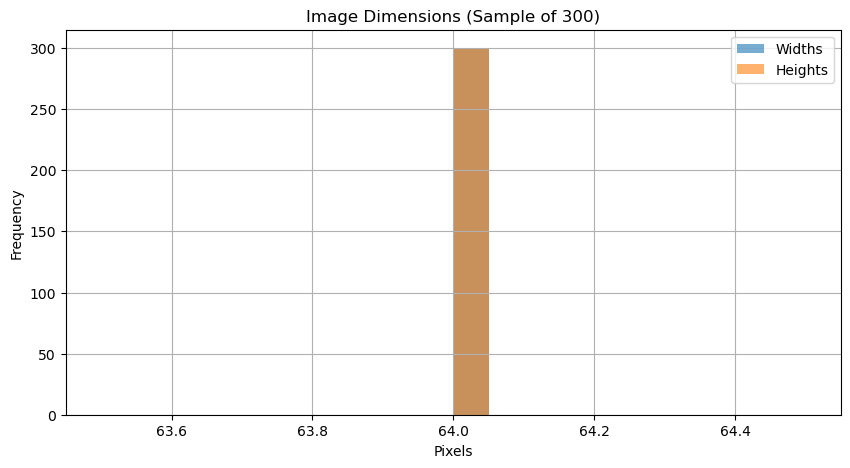

In [8]:
# look at image sizes
def get_image_sizes(data_dir, sample_limit=300):
    sizes = []
    count = 0
    for cls in os.listdir(data_dir):
        cls_path = os.path.join(data_dir, cls)
        if os.path.isdir(cls_path):
            for img_file in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        sizes.append(img.size)  # (width, height)
                        count += 1
                        if count >= sample_limit:
                            return sizes
                except:
                    continue
    return sizes

# get sizes from training set
image_sizes = get_image_sizes(train_dir)

# graph
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, alpha=0.6, label='Widths')
plt.hist(heights, bins=20, alpha=0.6, label='Heights')
plt.title("Image Dimensions (Sample of 300)")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


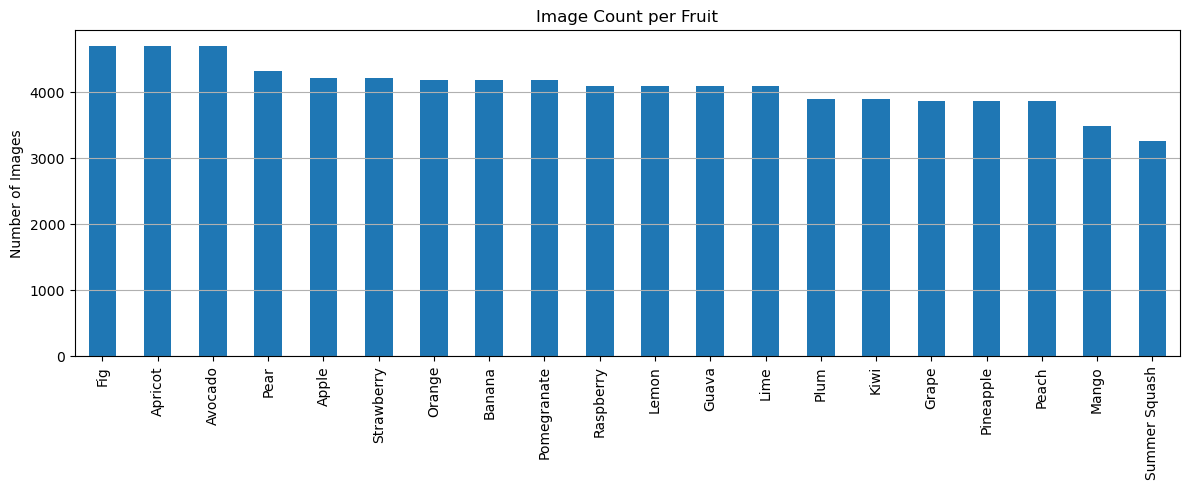

In [9]:
# summed each column to count images of each fruit
fruit_counts = labels_df.drop(columns=["FileName"]).sum().sort_values(ascending=False)
fruit_counts.plot(kind="bar", figsize=(12, 5), title="Image Count per Fruit")
plt.ylabel("Number of Images")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [10]:
apple_df = labels_df[labels_df["Apple"] == 1]
print(f"Number of Apple images: {len(apple_df)}")
apple_df.head()

Number of Apple images: 4216


,FileName,Mango,Grape,Plum,Kiwi,Pear,Apple,Orange,Banana,Pomegranate,...,Pineapple,Fig,Peach,Apricot,Avocado,Summer Squash,Lemon,Lime,Guava,Raspberry
3486,20190108_201647.jpg,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3487,20190108_201650.jpg,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3488,20190108_201653.jpg,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3489,20190108_201655.jpg,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3490,20190108_201703.jpg,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


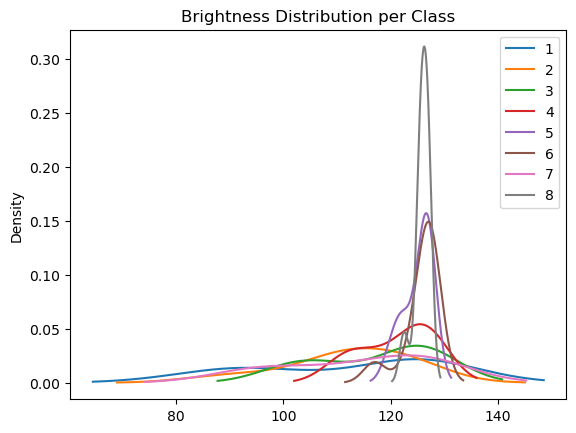

In [13]:
def get_brightness(image):
    grayscale = image.convert("L")
    stat = grayscale.getextrema()
    return (stat[0] + stat[1]) / 2

brightness_scores = []
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    for img_name in random.sample(os.listdir(cls_path), 10):  # 10 per class
        with Image.open(os.path.join(cls_path, img_name)) as img:
            brightness_scores.append((cls, get_brightness(img)))

# convert to DataFrame
df_bright = pd.DataFrame(brightness_scores, columns=["Class", "Brightness"])
df_bright.groupby("Class")["Brightness"].plot(kind="kde", legend=True)
plt.title("Brightness Distribution per Class")
plt.show()
